Reply per message 
like per post
post per message
unfriend per newfriend


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import os

churn_data=pd.read_csv("socialnet7_dataset2.csv", index_col=[0,1])
churn_data
#churn_data=churn_data[churn_data['adview_per_post'] != 0]

,,is_churn,like_per_month,newfriend_per_month,post_per_month,adview_per_month,dislike_per_month,unfriend_per_month,message_per_month,reply_per_month,account_tenure,...,reply_per_message,like_per_post,post_per_message,unfriend_per_newfriend,dislike_pcnt,unfriend_per_newfriend_scaled,newfriend_pcnt_chng,days_since_newfriend,unfriend_28day_avg_84day_obs,unfriend_28day_avg_84day_obs_scaled
account_id,observation_date,,,,,,,,,,,,,,,,,,,,,
27,2020-03-01,False,28.0,5.0,14.0,33.0,2.0,1.0,1.0,0.0,55.0,...,0.000000,2.000000,14.000000,0.20,0.066667,0.101818,4.000000,3.0,0.333333,0.509091
51,2020-03-01,False,26.0,5.0,4.0,19.0,4.0,1.0,42.0,28.0,55.0,...,0.666667,6.500000,0.095238,0.20,0.133333,0.203636,-0.166667,1.0,0.666667,1.018182
95,2020-03-01,False,74.0,5.0,64.0,17.0,20.0,0.0,12.0,6.0,55.0,...,0.500000,1.156250,5.333334,0.00,0.212766,0.000000,0.250000,1.0,0.000000,0.000000
123,2020-03-01,False,28.0,6.0,13.0,4.0,25.0,0.0,11.0,1.0,55.0,...,0.090909,2.153846,1.181818,0.00,0.471698,0.000000,1.000000,2.0,0.000000,0.000000
189,2020-03-01,True,3.0,1.0,8.0,16.0,2.0,0.0,0.0,0.0,55.0,...,0.000000,0.375000,0.000000,0.00,0.400000,0.000000,0.000000,15.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13132,2020-05-10,False,19.0,0.0,20.0,2.0,3.0,0.0,27.0,6.0,25.0,...,0.222222,0.950000,0.740741,0.00,0.136364,0.000000,0.000000,0.0,0.000000,0.000000
13141,2020-05-10,False,3.0,1.0,6.0,9.0,1.0,0.0,13.0,5.0,25.0,...,0.384615,0.500000,0.461538,0.00,0.250000,0.000000,0.000000,18.0,0.000000,0.000000
13155,2020-05-10,False,2.0,0.0,1.0,1.0,1.0,0.0,27.0,17.0,25.0,...,0.629630,2.000000,0.037037,0.00,0.333333,0.000000,0.000000,0.0,0.000000,0.000000


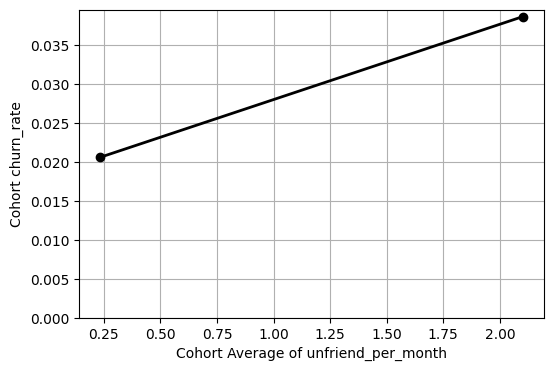

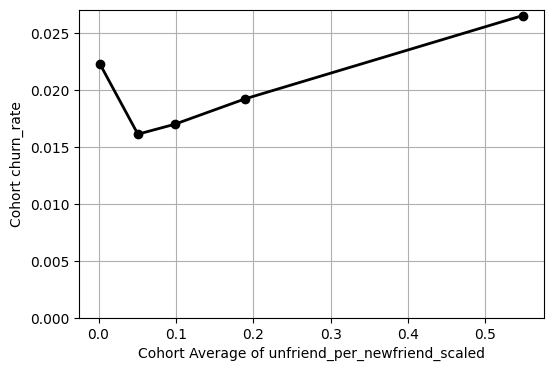

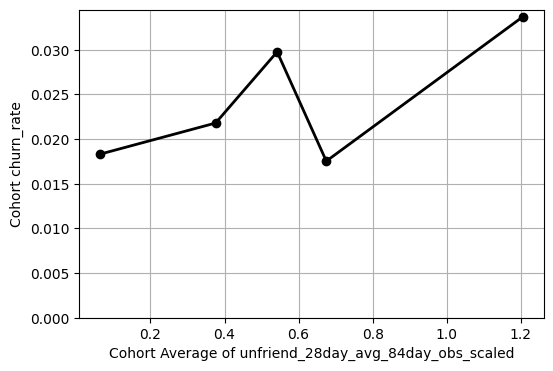

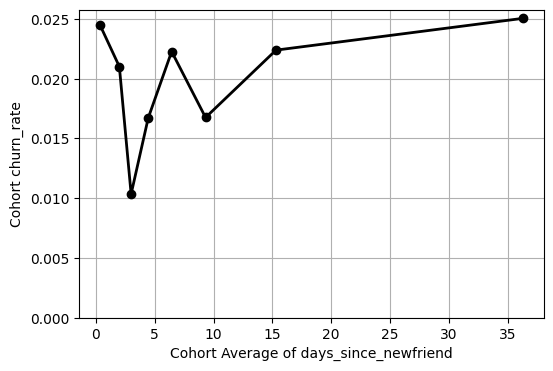

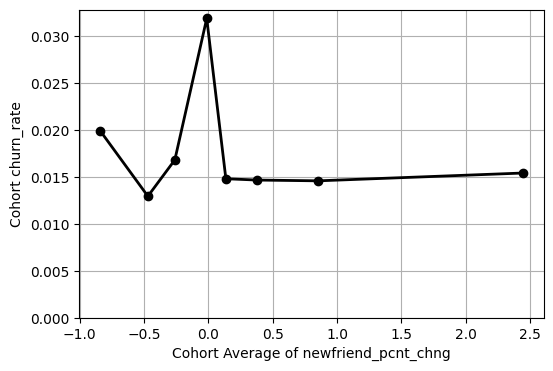

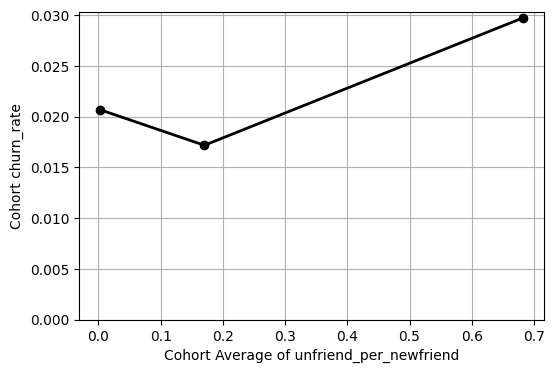

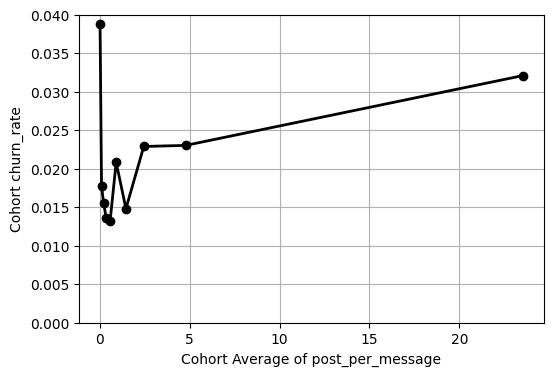

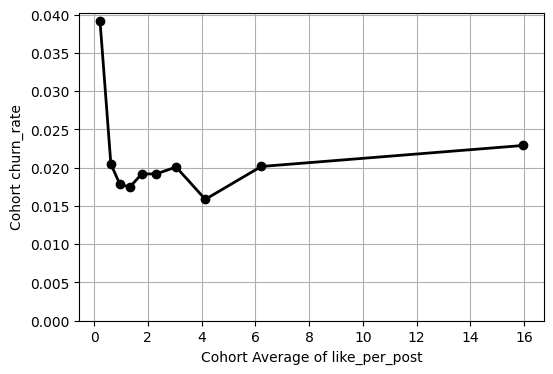

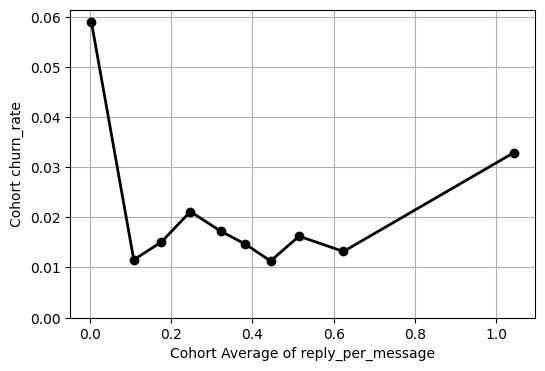

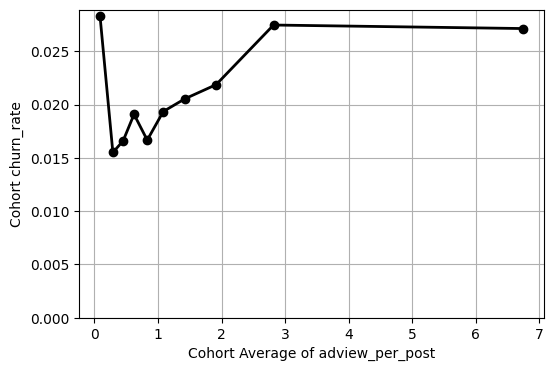

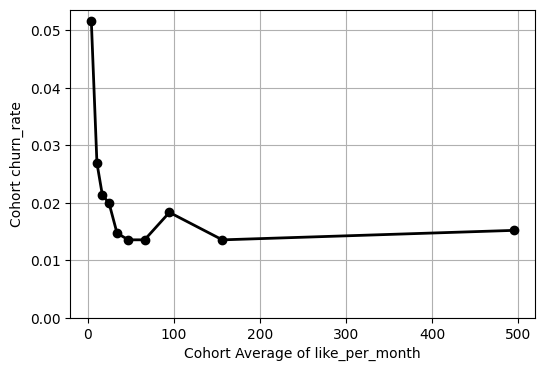

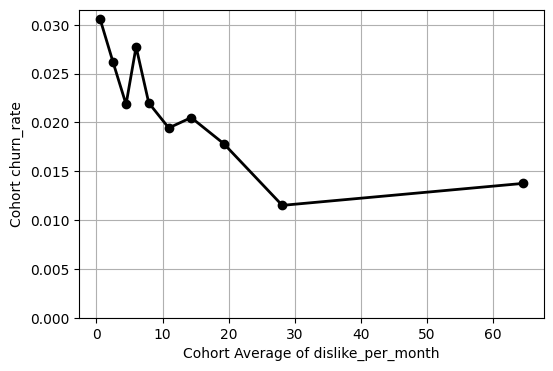

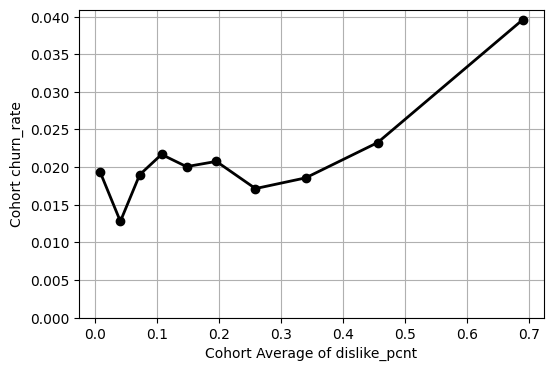

In [5]:

metric_list = [
    'unfriend_per_month',
    'unfriend_per_newfriend_scaled',
    'unfriend_28day_avg_84day_obs_scaled',
    'days_since_newfriend',
    'newfriend_pcnt_chng',
    'unfriend_per_newfriend',
    'post_per_message',
    'like_per_post',
    'reply_per_message',
    'adview_per_post',
    'like_per_month',
    'dislike_per_month',
    'dislike_pcnt'
]

for i in metric_list:
    
    ncohort = 10
    groups = pd.qcut(churn_data[i], ncohort, duplicates='drop')
    cohort_means = churn_data.groupby(groups, observed=False)[i].mean()
    cohort_churns = churn_data.groupby(groups, observed=False)["is_churn"].mean()
    plot_frame = pd.DataFrame(
    {
        i: cohort_means.values,
        'churn_rate' : cohort_churns.values
    })
    
    #print(plot_frame)

    plt.figure(figsize=(6,4))
    plt.plot(i, 
             'churn_rate', 
             data=plot_frame, 
             label=i, 
             marker='o', 
             linewidth=2, 
             color='black')
    
    plt.xlabel("Cohort Average of " + i)
    plt.ylabel("Cohort churn_rate")
    plt.grid()
    plt.gca().set_ylim(bottom=0)
    #plt.gca().set_xscale('log')
    plt.savefig(i+"_cohort.png")